In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#### Phase 2.1: Start Cleaning Dataset 1 (MCX India Price)

In [2]:
df1 = pd.read_csv("Dataset/1_Gold Price.csv")  ## Load Dataset 1 

In [3]:
# Convert Date to datetime
df1['Date'] = pd.to_datetime(df1['Date'])

# Sort rows by Date
df1 = df1.sort_values('Date').reset_index(drop=True)

# Clean Chg% column -> remove % sign
df1['Chg%'] = df1['Chg%'].astype(str).str.replace('%', '', regex=False)
df1['Chg%'] = pd.to_numeric(df1['Chg%'], errors='coerce')

df1.head()


,Date,Price,Open,High,Low,Volume,Chg%
0,2014-01-01,29542,29435,29598,29340,2930,0.25
1,2014-01-02,29975,29678,30050,29678,3140,1.47
2,2014-01-03,29727,30031,30125,29539,3050,-0.83
3,2014-01-04,29279,29279,29279,29279,0,-1.51
4,2014-01-06,29119,29300,29395,29051,24380,-0.55


In [4]:
df1.info()
df1.describe()
df1.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2848 non-null   datetime64[ns]
 1   Price   2848 non-null   int64         
 2   Open    2848 non-null   int64         
 3   High    2848 non-null   int64         
 4   Low     2848 non-null   int64         
 5   Volume  2848 non-null   int64         
 6   Chg%    2848 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(5)
memory usage: 155.9 KB


Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Chg%      0
dtype: int64

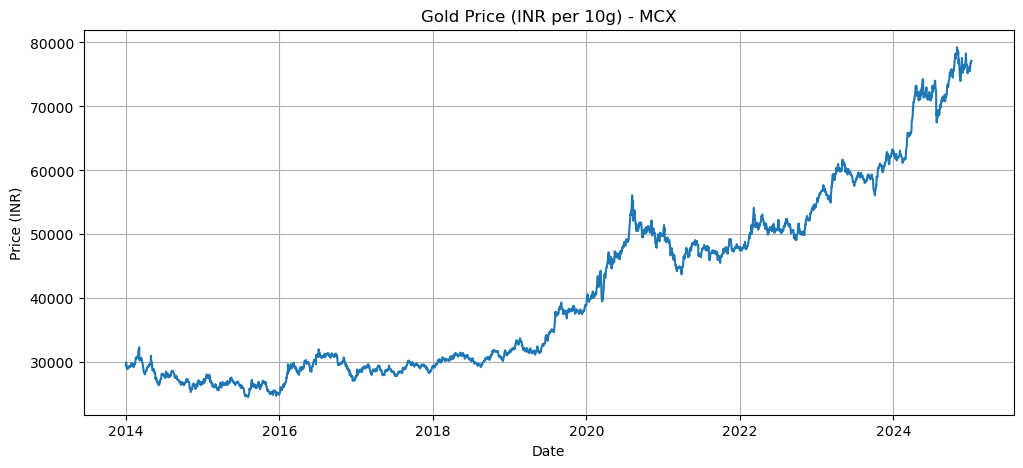

In [5]:
plt.figure(figsize=(12,5))
plt.plot(df1['Date'], df1['Price'])
plt.title("Gold Price (INR per 10g) - MCX")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()


#### PHASE 2.2 — Clean Dataset 3 (1978–2023 WGC Data)

In [6]:
df3 = pd.read_csv("Dataset/dataset_2_1978–2023/Daily.csv")
df3.head()

,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,12/29/1978,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/1979,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/2/1979,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",NaN,194.6,193.6
3,1/3/1979,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",NaN,192.2,193.0
4,1/4/1979,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",NaN,193.0,194.6


In [7]:
# Convert Date to datetime
df3['Date'] = pd.to_datetime(df3['Date'])

# Sort by Date
df3 = df3.sort_values('Date').reset_index(drop=True)

df3.head()


,Date,USD,EUR,JPY,GBP,CAD,CHF,INR,CNY,TRY,SAR,IDR,AED,THB,VND,EGP,KRW,RUB,ZAR,AUD
0,1978-12-29,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-01-01,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-01-02,226.8,137.3,"43,164.9",111.5,263.7,359.6,"1,792.9",NaN,NaN,735.6,"138,160.5",851.3,"4,454.6",NaN,NaN,"107,470.0",NaN,194.6,193.6
3,1979-01-03,218.6,134.0,"43,717.9",108.0,264.4,365.9,"1,802.2",NaN,NaN,739.4,"138,877.0",855.7,"4,477.7",NaN,NaN,"108,027.4",NaN,192.2,193.0
4,1979-01-04,223.2,136.8,"43,674.9",110.7,264.1,366.4,"1,811.7",NaN,NaN,743.4,"139,616.3",860.3,"4,501.5",NaN,NaN,"108,602.5",NaN,193.0,194.6


In [8]:
# Keep only the Date and INR columns
df_inr = df3[['Date', 'INR']].copy()

df_inr.head()


,Date,INR
0,1978-12-29,NaN
1,1979-01-01,NaN
2,1979-01-02,"1,792.9"
3,1979-01-03,"1,802.2"
4,1979-01-04,"1,811.7"


In [9]:
# Convert INR column to numeric by removing commas and invalid values
df_inr['INR'] = df_inr['INR'].astype(str).str.replace(',', '', regex=False)

# Convert to numeric, forcing invalid strings to NaN
df_inr['INR'] = pd.to_numeric(df_inr['INR'], errors='coerce')

df_inr[['Date', 'INR']].head()


,Date,INR
0,1978-12-29,NaN
1,1979-01-01,NaN
2,1979-01-02,1792.9
3,1979-01-03,1802.2
4,1979-01-04,1811.7


In [10]:
# Convert INR per ounce to INR per gram
df_inr['INR_per_gram'] = df_inr['INR'] / 31.1035

# Convert to INR per 10 grams (Rupeek standard)
df_inr['INR_per_10g'] = df_inr['INR_per_gram'] * 10

df_inr.head()


,Date,INR,INR_per_gram,INR_per_10g
0,1978-12-29,NaN,NaN,NaN
1,1979-01-01,NaN,NaN,NaN
2,1979-01-02,1792.9,57.643031,576.430305
3,1979-01-03,1802.2,57.942032,579.420322
4,1979-01-04,1811.7,58.247464,582.474641


In [11]:
df_inr.isna().sum()
df_inr = df_inr.fillna(method='ffill')


C:\Users\brahm\AppData\Local\Temp\ipykernel_18216\880004094.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_inr = df_inr.fillna(method='ffill')


In [12]:
df_inr['INR_per_10g'] = df_inr['INR_per_10g'].fillna(method='ffill')
df_inr


C:\Users\brahm\AppData\Local\Temp\ipykernel_18216\3492580373.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_inr['INR_per_10g'] = df_inr['INR_per_10g'].fillna(method='ffill')


,Date,INR,INR_per_gram,INR_per_10g
0,1978-12-29,NaN,NaN,NaN
1,1979-01-01,NaN,NaN,NaN
2,1979-01-02,1792.9,57.643031,576.430305
3,1979-01-03,1802.2,57.942032,579.420322
4,1979-01-04,1811.7,58.247464,582.474641
...,...,...,...,...
11621,2023-07-17,159940.3,5142.196216,51421.962159
11622,2023-07-18,162067.1,5210.574373,52105.743727
11623,2023-07-19,162141.7,5212.972817,52129.728166
11624,2023-07-20,162159.4,5213.541884,52135.418844


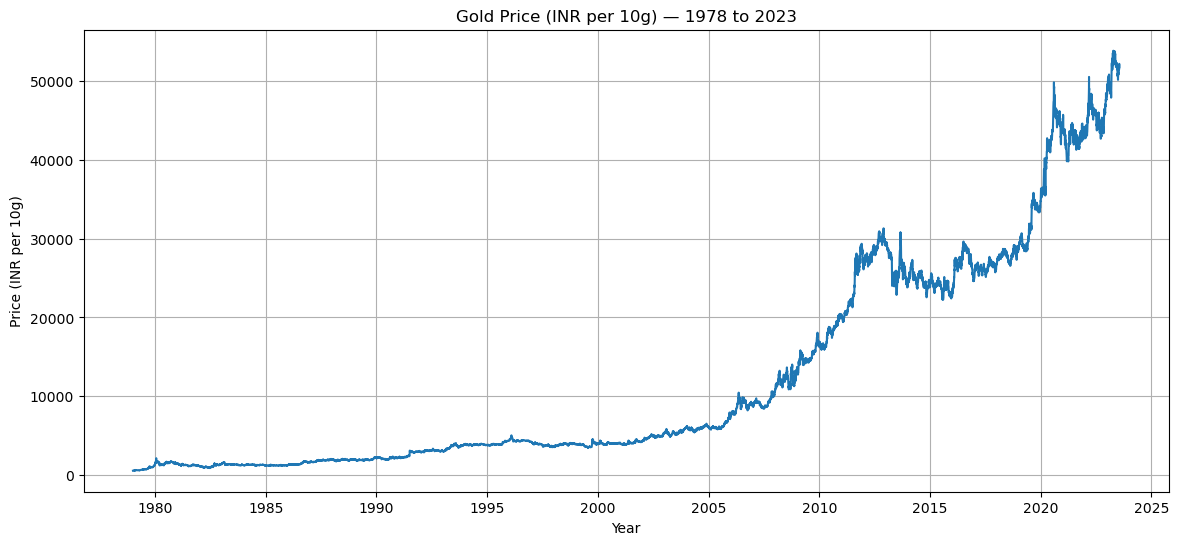

In [13]:
plt.figure(figsize=(14,6))
plt.plot(df_inr['Date'], df_inr['INR_per_10g'])
plt.title("Gold Price (INR per 10g) — 1978 to 2023")
plt.xlabel("Year")
plt.ylabel("Price (INR per 10g)")
plt.grid(True)
plt.show()


#### PHASE 3 — Merge Dataset 1 (MCX Actual Prices) + Dataset 3 (Historical Prices)

In [14]:
# Keep only Date and Price columns from Dataset 1
df1_clean = df1[['Date', 'Price']].copy()
df1_clean = df1_clean.rename(columns={'Price': 'Price_10g'})
df1_clean.head()


,Date,Price_10g
0,2014-01-01,29542
1,2014-01-02,29975
2,2014-01-03,29727
3,2014-01-04,29279
4,2014-01-06,29119


In [15]:
# Keep only Date and INR_per_10g columns
df3_clean = df_inr[['Date', 'INR_per_10g']].copy()
df3_clean = df3_clean.rename(columns={'INR_per_10g': 'Price_10g'})
df3_clean.head()


,Date,Price_10g
0,1978-12-29,NaN
1,1979-01-01,NaN
2,1979-01-02,576.430305
3,1979-01-03,579.420322
4,1979-01-04,582.474641


In [16]:
# Merge both datasets using an outer join
merged = pd.merge(df3_clean, df1_clean, on='Date', how='outer', suffixes=('_hist', '_mcx'))

merged.head(20)


,Date,Price_10g_hist,Price_10g_mcx
0,1978-12-29,NaN,NaN
1,1979-01-01,NaN,NaN
2,1979-01-02,576.430305,NaN
3,1979-01-03,579.420322,NaN
4,1979-01-04,582.474641,NaN
5,1979-01-05,592.730722,NaN
6,1979-01-08,591.991255,NaN
7,1979-01-09,585.946919,NaN
8,1979-01-10,579.838282,NaN
9,1979-01-11,583.407012,NaN


In [17]:
merged['Gold_Price'] = merged['Price_10g_mcx'].combine_first(merged['Price_10g_hist'])

In [18]:
# Sort by date
merged = merged.sort_values('Date').reset_index(drop=True)

# Forward-fill missing values
merged['Gold_Price'] = merged['Gold_Price'].fillna(method='ffill')


C:\Users\brahm\AppData\Local\Temp\ipykernel_18216\942082458.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged['Gold_Price'] = merged['Gold_Price'].fillna(method='ffill')


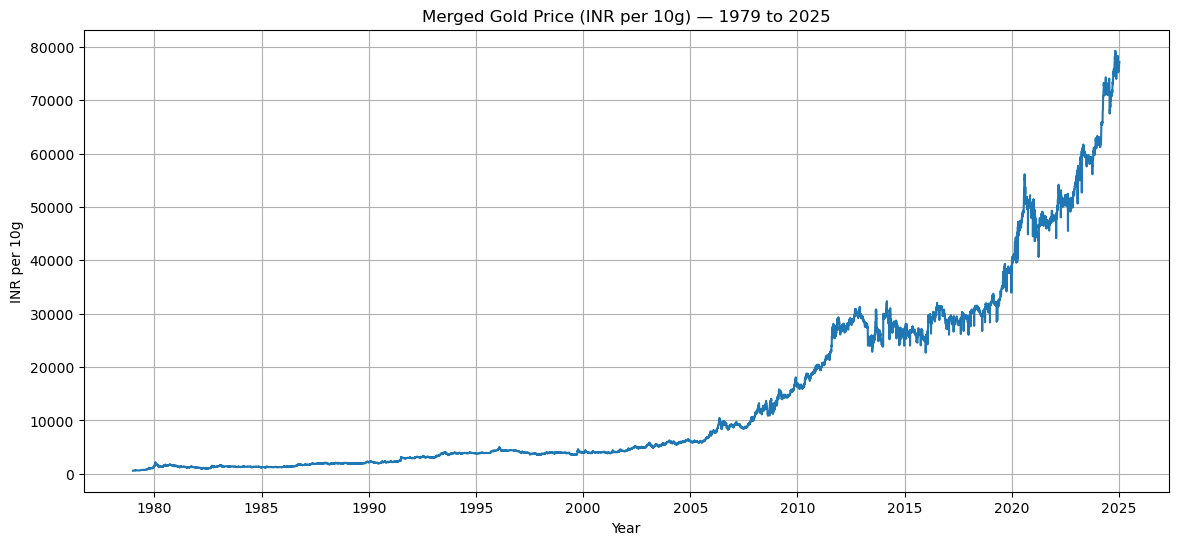

In [19]:
plt.figure(figsize=(14,6))
plt.plot(merged['Date'], merged['Gold_Price'])
plt.title("Merged Gold Price (INR per 10g) — 1979 to 2025")
plt.xlabel("Year")
plt.ylabel("INR per 10g")
plt.grid(True)
plt.show()


In [25]:
ts = merged[['Date', 'Gold_Price']].copy()
ts = ts.set_index('Date').asfreq('D')
ts['Gold_Price'] = ts['Gold_Price'].fillna(method='ffill')

ts.reset_index().to_csv("gold_price_ts_daily.csv", index=False)
merged.to_csv("gold_price_merged.csv", index=False)

display("Phase 3 data regenerated and saved successfully!")

C:\Users\brahm\AppData\Local\Temp\ipykernel_18216\1698756489.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts['Gold_Price'] = ts['Gold_Price'].fillna(method='ffill')


'Phase 3 data regenerated and saved successfully!'

#### PHASE 4 — Time Series Forecasting (Prophet / ARIMA)

In [24]:
ts = pd.read_csv("gold_price_ts_daily.csv", parse_dates=["Date"]).set_index("Date")

# Ensure numeric
ts["Gold_Price"] = pd.to_numeric(ts["Gold_Price"], errors="coerce").fillna(method="ffill")

print("Loaded daily series:")
print("Date range:", ts.index.min(), "→", ts.index.max())
ts.head()


Loaded daily series:
Date range: 1978-12-29 00:00:00 → 2025-01-06 00:00:00


C:\Users\brahm\AppData\Local\Temp\ipykernel_18216\3422370344.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ts["Gold_Price"] = pd.to_numeric(ts["Gold_Price"], errors="coerce").fillna(method="ffill")


,Gold_Price
Date,
1978-12-29,NaN
1978-12-30,NaN
1978-12-31,NaN
1979-01-01,NaN
1979-01-02,576.430305


In [26]:
# Phase 4 - Forecasting Model
forecast_horizon = 90  # days to predict

# Try Prophet first
try:
    from prophet import Prophet
    use_prophet = True
except:
    use_prophet = False

if use_prophet:
    print("Using Prophet model...")
    dfp = ts.reset_index().rename(columns={"Date": "ds", "Gold_Price": "y"}).dropna()
    m = Prophet(daily_seasonality=True, yearly_seasonality=True)
    m.fit(dfp)

    future = m.make_future_dataframe(periods=forecast_horizon)
    forecast_raw = m.predict(future)

    forecast = forecast_raw[["ds", "yhat", "yhat_lower", "yhat_upper"]]
    forecast = forecast.tail(forecast_horizon).rename(columns={"ds": "Date"})
    model_name = "Prophet"

else:
    print("Using Holt-Winters (Exponential Smoothing)...")
    from statsmodels.tsa.holtwinters import ExponentialSmoothing

    y = ts["Gold_Price"].astype(float)
    model = ExponentialSmoothing(y, trend="add", seasonal=None, damped_trend=True)
    fit = model.fit(optimized=True)

    future_index = pd.date_range(start=y.index[-1] + pd.Timedelta(days=1),
                                 periods=forecast_horizon)

    y_forecast = fit.forecast(forecast_horizon)
    forecast = pd.DataFrame({
        "Date": future_index,
        "yhat": y_forecast.values,
        "yhat_lower": np.nan,
        "yhat_upper": np.nan
    })
    model_name = "Holt-Winters"


Using Holt-Winters (Exponential Smoothing)...


c:\Users\brahm\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:903: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [27]:
# Phase 4 - Save Forecast
forecast["Date"] = pd.to_datetime(forecast["Date"])
forecast = forecast.rename(columns={
    "yhat": "Forecast",
    "yhat_lower": "Lower",
    "yhat_upper": "Upper"
})

forecast.to_csv("gold_price_forecast_90d.csv", index=False)
print("Saved: gold_price_forecast_90d.csv")

# Combine history + forecast for later use
hist = ts.reset_index().rename(columns={"Gold_Price": "Historical"})
combined = pd.concat(
    [hist.set_index("Date"), forecast.set_index("Date")],
    axis=0
).reset_index()

combined.to_csv("gold_price_history_and_forecast.csv", index=False)
print("Saved: gold_price_history_and_forecast.csv")

forecast.head()


Saved: gold_price_forecast_90d.csv
Saved: gold_price_history_and_forecast.csv


,Date,Forecast,Lower,Upper
0,2025-01-07,NaN,NaN,NaN
1,2025-01-08,NaN,NaN,NaN
2,2025-01-09,NaN,NaN,NaN
3,2025-01-10,NaN,NaN,NaN
4,2025-01-11,NaN,NaN,NaN


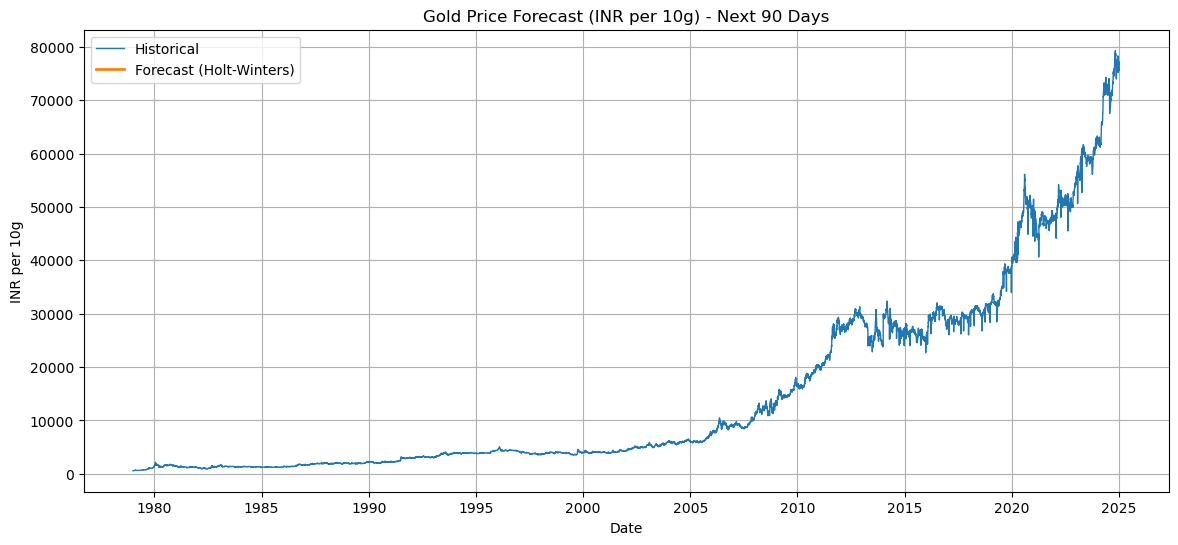

In [28]:
# Phase 4 - Plot Forecast
plt.figure(figsize=(14, 6))

# Plot history
plt.plot(ts.index, ts["Gold_Price"], label="Historical", linewidth=1)

# Plot forecast
plt.plot(forecast["Date"], forecast["Forecast"], label=f"Forecast ({model_name})", linewidth=2)

# Plot confidence interval (only works for Prophet)
if forecast["Lower"].notna().any():
    plt.fill_between(forecast["Date"],
                     forecast["Lower"].fillna(forecast["Forecast"]),
                     forecast["Upper"].fillna(forecast["Forecast"]),
                     alpha=0.3, color="gray")

plt.title(f"Gold Price Forecast (INR per 10g) - Next {forecast_horizon} Days")
plt.xlabel("Date")
plt.ylabel("INR per 10g")
plt.legend()
plt.grid(True)
plt.show()


#### PHASE 5 — LTV STRESS TESTING

In [29]:
np.random.seed(42)

# Number of loans to simulate
n_loans = 500

loan_df = pd.DataFrame({
    "loan_id": range(1, n_loans+1),
    "disbursal_date": pd.to_datetime(
        np.random.choice(ts.index.strftime("%Y-%m-%d"), n_loans)
    ),
    "loan_amount": np.random.randint(20000, 300000, n_loans),    # 20k - 3 lakh
    "gold_weight_g": np.random.uniform(5, 50, n_loans),          # 5g - 50g
    "purity": np.random.choice([22, 23, 24], n_loans)            # 22K - 24K
})

# purity factor
purity_map = {22: 0.916, 23: 0.958, 24: 1.0}
loan_df["purity_factor"] = loan_df["purity"].map(purity_map)

loan_df.head()


,loan_id,disbursal_date,loan_amount,gold_weight_g,purity,purity_factor
0,1,2022-03-28,76178,26.340679,23,0.958
1,2,1981-05-07,69407,20.497268,23,0.958
2,3,1993-10-01,70990,20.819307,24,1.000
3,4,2011-10-01,149473,23.575710,22,0.916
4,5,2009-11-20,246156,36.721650,22,0.916


In [30]:
current_price_10g = ts["Gold_Price"].iloc[-1]
current_price_per_g = current_price_10g / 10

current_price_per_g

7714.9

In [31]:
loan_df["gold_value_now"] = loan_df["gold_weight_g"] * loan_df["purity_factor"] * current_price_per_g

loan_df["LTV_now"] = (loan_df["loan_amount"] / loan_df["gold_value_now"]) * 100

loan_df.head()

,loan_id,disbursal_date,loan_amount,gold_weight_g,purity,purity_factor,gold_value_now,LTV_now
0,1,2022-03-28,76178,26.340679,23,0.958,194680.644030,39.129725
1,2,1981-05-07,69407,20.497268,23,0.958,151492.728803,45.815400
2,3,1993-10-01,70990,20.819307,24,1.000,160618.873511,44.197795
3,4,2011-10-01,149473,23.575710,22,0.916,166605.966919,89.716475
4,5,2009-11-20,246156,36.721650,22,0.916,259506.331682,94.855489


In [33]:
forecast = pd.read_csv("gold_price_forecast_90d.csv", parse_dates=["Date"])
forecast = forecast.rename(columns={"Forecast": "forecast_price_10g"})

# Convert forecast to per gram
forecast["forecast_price_g"] = forecast["forecast_price_10g"] / 10

forecast.head()

#Picking forecast day 30 (1 month later) for risk modeling:
forecast_day30_price_g = forecast["forecast_price_g"].iloc[29]  # day 30
forecast_day30_price_g

nan

In [34]:
loan_df["gold_value_forecast"] = loan_df["gold_weight_g"] * loan_df["purity_factor"] * forecast_day30_price_g

loan_df["LTV_forecast"] = (loan_df["loan_amount"] / loan_df["gold_value_forecast"]) * 100

loan_df.head()

,loan_id,disbursal_date,loan_amount,gold_weight_g,purity,purity_factor,gold_value_now,LTV_now,gold_value_forecast,LTV_forecast
0,1,2022-03-28,76178,26.340679,23,0.958,194680.644030,39.129725,NaN,NaN
1,2,1981-05-07,69407,20.497268,23,0.958,151492.728803,45.815400,NaN,NaN
2,3,1993-10-01,70990,20.819307,24,1.000,160618.873511,44.197795,NaN,NaN
3,4,2011-10-01,149473,23.575710,22,0.916,166605.966919,89.716475,NaN,NaN
4,5,2009-11-20,246156,36.721650,22,0.916,259506.331682,94.855489,NaN,NaN


In [ ]:
stress_levels = {
    "-5%": 0.95,
    "-10%": 0.90,
    "-20%": 0.80
}

for label, factor in stress_levels.items():
    price_g = current_price_per_g * factor
    loan_df[f"LTV_{label}"] = (loan_df["loan_amount"] /
                               (loan_df["gold_weight_g"] * loan_df["purity_factor"] * price_g)
                              ) * 100

loan_df.head()


,loan_id,disbursal_date,loan_amount,gold_weight_g,purity,purity_factor,gold_value_now,LTV_now,gold_value_forecast,LTV_forecast,LTV_-5%,LTV_-10%,LTV_-20%
0,1,2022-03-28,76178,26.340679,23,0.958,194680.644030,39.129725,NaN,NaN,41.189184,43.477472,48.912156
1,2,1981-05-07,69407,20.497268,23,0.958,151492.728803,45.815400,NaN,NaN,48.226737,50.906000,57.269250
2,3,1993-10-01,70990,20.819307,24,1.000,160618.873511,44.197795,NaN,NaN,46.523994,49.108661,55.247243
3,4,2011-10-01,149473,23.575710,22,0.916,166605.966919,89.716475,NaN,NaN,94.438394,99.684972,112.145593
4,5,2009-11-20,246156,36.721650,22,0.916,259506.331682,94.855489,NaN,NaN,99.847883,105.394988,118.569361


In [36]:
for col in ["LTV_now", "LTV_forecast", "LTV_-5%", "LTV_-10%", "LTV_-20%"]:
    loan_df[f"Risk_{col}"] = loan_df[col] > 75

loan_df.head()


,loan_id,disbursal_date,loan_amount,gold_weight_g,purity,purity_factor,gold_value_now,LTV_now,gold_value_forecast,LTV_forecast,LTV_-5%,LTV_-10%,LTV_-20%,Risk_LTV_now,Risk_LTV_forecast,Risk_LTV_-5%,Risk_LTV_-10%,Risk_LTV_-20%
0,1,2022-03-28,76178,26.340679,23,0.958,194680.644030,39.129725,NaN,NaN,41.189184,43.477472,48.912156,False,False,False,False,False
1,2,1981-05-07,69407,20.497268,23,0.958,151492.728803,45.815400,NaN,NaN,48.226737,50.906000,57.269250,False,False,False,False,False
2,3,1993-10-01,70990,20.819307,24,1.000,160618.873511,44.197795,NaN,NaN,46.523994,49.108661,55.247243,False,False,False,False,False
3,4,2011-10-01,149473,23.575710,22,0.916,166605.966919,89.716475,NaN,NaN,94.438394,99.684972,112.145593,True,False,True,True,True
4,5,2009-11-20,246156,36.721650,22,0.916,259506.331682,94.855489,NaN,NaN,99.847883,105.394988,118.569361,True,False,True,True,True


In [37]:
summary = pd.DataFrame({
    "Scenario": ["Now", "Forecast", "-5%", "-10%", "-20%"],
    "Risky Loans Count": [
        (loan_df["LTV_now"] > 75).sum(),
        (loan_df["LTV_forecast"] > 75).sum(),
        (loan_df["LTV_-5%"] > 75).sum(),
        (loan_df["LTV_-10%"] > 75).sum(),
        (loan_df["LTV_-20%"] > 75).sum()
    ]
})

summary


,Scenario,Risky Loans Count
0,Now,246
1,Forecast,0
2,-5%,258
3,-10%,278
4,-20%,315


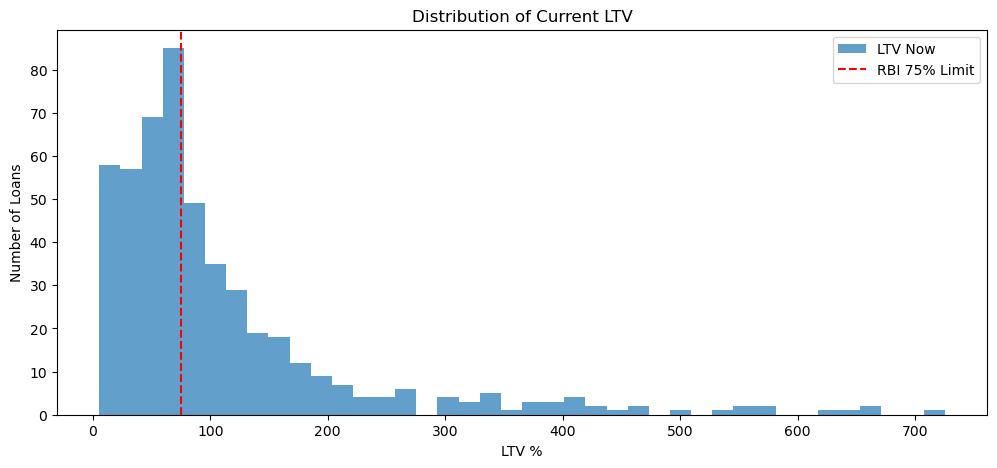

In [38]:
plt.figure(figsize=(12,5))
plt.hist(loan_df["LTV_now"], bins=40, alpha=0.7, label="LTV Now")
plt.axvline(75, color="red", linestyle="--", label="RBI 75% Limit")
plt.title("Distribution of Current LTV")
plt.xlabel("LTV %")
plt.ylabel("Number of Loans")
plt.legend()
plt.show()


In [39]:
loan_df.to_csv('Dataset/simulated_loan_portfolio.csv', index=False)